### loading the packages

In [1]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')

import re
import preprocessor as p

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Read the data

In [2]:
os.chdir(r'C:\Users\deepak.reji\Documents\Python Scripts')
df = pd.read_csv('train_E6oV3lV.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
    #set up punctuations we want to be replaced
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
    REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
    tempArr = []
    for line in df:
        # send to tweet_processor
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

In [4]:
# cleaning the tweets
df['clean tweet'] = clean_tweets(df['tweet'])
df.head()

,id,label,tweet,clean tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now


In [5]:
corpus = list(df['clean tweet'])
corpus = corpus[0:100]

### Clustering

In [6]:
corpus_embeddings = embedder.encode(corpus)

In [8]:
corpus_embeddings

array([[-1.0903804 , -0.4355496 , -0.18660884, ..., -0.31698513,
         0.6723965 , -0.16499545],
       [-0.51904905,  0.05252026, -0.12434611, ...,  0.42281592,
         0.56469977, -0.3622992 ],
       [-0.57401556,  0.2891437 ,  0.29484245, ..., -0.608961  ,
        -0.04336846, -0.14719626],
       ...,
       [-0.13383201, -1.2370156 ,  0.37747467, ..., -0.50582075,
         0.5441101 , -0.8855076 ],
       [-0.6118345 , -0.52159023, -0.04300832, ..., -0.5347256 ,
         0.19781338, -0.77683914],
       [-1.1217117 , -0.3185658 ,  0.3229343 , ..., -0.5356313 ,
         0.23396969, -0.05576893]], dtype=float32)

In [13]:
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_


In [14]:
cluster_assignment

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [15]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

,corpus,cluster
0,when a father is dysfunctional and is so selfi...,1
1,thanks for credit i cant use cause they dont o...,1
2,bihday your majesty,0
3,i love u take with u all the time in ur,1
4,factsguide society now,0


### Result

In [16]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['bihday your majesty', 'factsguide society now', 'we won love the land', 'welcome here  im its so ', 'we are so selfish', 'no comment in', 'ouchjunior is angry', 'i am thankful for having a paner', 'retweet if you agree', 'its  smiles all around via ig user make people', 'as we all know essential oils are not made of chemicals', 'sad little dude', 'lumpy says i am a  prove it lumpy', 'to my ', 'we had a great panel on the mediatization of the public service', 'happy fathers day', 'does', 'morning~~', 'once more only one word tells it all ', 'i am thankful for sunshine', 'lovely echeveria blooms', 'i am amazing', 'im and goes ', 'feeling blue', 'the best pa about life is knowing who you are', 'getting ready remove the victums frm', 'for her we got her a we love you', 'let the scum baggery begin', 'thank you super love it zpamdelacruz dolores capas tarlac', 'lets fight against', 'happy fathers day mr rayos', 'ascot times with this babe', 'the weekendis here', 'we are ready to

### Lets Visualize the data !!!

In [17]:
#word cloud
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(width=800, height=500,
    random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    

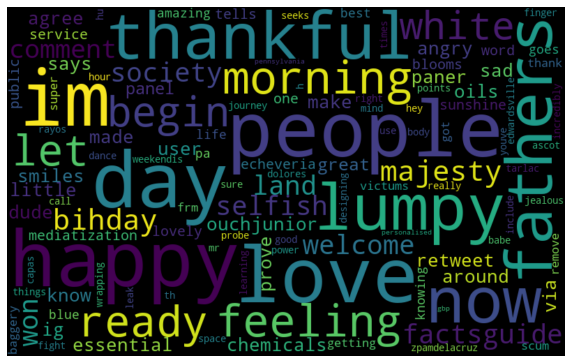

In [18]:
word_cloud(cluster_df,0)

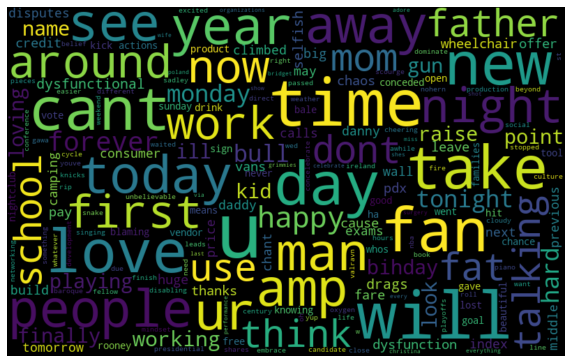

In [19]:
word_cloud(cluster_df,1)